In [6]:
import numpy as np
import pandas as pd

In [3]:
def get_gene(df, genes):
    # Extract column names from the DataFrame
    existing_columns = df.columns
    
    # Specify the desired columns
    desired_columns = genes
    
    # Find missing columns
    missing_columns = [col for col in desired_columns if col not in existing_columns]
    # print(missing_columns)
    # Fill missing columns with 0
    for col in missing_columns:
        df[col] = 0
    df = df[desired_columns]
    print('ok')
    return df



In [4]:
cnts_directory = '/data/haunt/st2image/data/ST-cnts/'
files = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
genes = []
for patient in files:
    if patient in ('A', 'B', 'C', 'D'):
        for i in range(1, 7):
            cnts_file = cnts_directory + f"{patient}{i}.tsv/" + f'ut_{patient}{i}_stdata_filtered.tsv'
            print(cnts_file)
            df = pd.read_csv(cnts_file, delimiter='\t')
            genes += df.columns.tolist()
    else:
        for i in range(1, 4):
            cnts_file = cnts_directory + f"{patient}{i}.tsv/" + f'ut_{patient}{i}_stdata_filtered.tsv'
            print(cnts_file)
            df = pd.read_csv(cnts_file, delimiter='\t')
            genes += df.columns.tolist()
genes = list(set(genes))

/data/haunt/st2image/data/ST-cnts/A1.tsv/ut_A1_stdata_filtered.tsv
/data/haunt/st2image/data/ST-cnts/A2.tsv/ut_A2_stdata_filtered.tsv
/data/haunt/st2image/data/ST-cnts/A3.tsv/ut_A3_stdata_filtered.tsv


KeyboardInterrupt: 

In [9]:
cnts_df_gene = genes + ['wsi_file_name', 'patient']

In [24]:
genes += ['index']

In [16]:
# Function to calculate the logarithm
def calculate_log(row):
    return np.log2((row * 1000) / row.sum() + 1)

def norm_gene(df):
    print('normalize gene count......')
    tmp_df = df.copy()
    df = df.drop(['Unnamed: 0'], axis=1)
    result = df.apply(lambda row: calculate_log(row), axis=1)
    result['index'] = tmp_df['Unnamed: 0']
    print('normalize gene count done!')
    return result

In [28]:
def extract_top_gene(gene_file_path, top_max_var_gene):
    df = pd.read_csv(gene_file_path, delimiter='\t')
    df = norm_gene(df)
    # Extract column names from the DataFrame
    existing_columns = df.columns

    # Specify the desired columns
    desired_columns = top_max_var_gene

    # Find missing columns
    missing_columns = [col for col in desired_columns if col not in existing_columns]

    # Fill missing columns with 0
    for col in missing_columns:
        df[col] = 0

    # Reorder the DataFrame columns based on desired columns
    df = df[desired_columns]
    df = df.fillna(0)
    return df

In [21]:
from tqdm import tqdm

In [36]:
# def create_data_gene_image(genes):
result = []
top_max_var_gene = genes
cnts_directory = '/data/haunt/st2image/data/ST-cnts/'
files = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
image_paths = []
for patient in files:
    if patient in ('A', 'B', 'C', 'D'):
        for i in range(1, 7):
            cnts_file = f'{cnts_directory}{patient}{i}.tsv/ut_{patient}{i}_stdata_filtered.tsv'
            print(cnts_file)
            df = extract_top_gene(cnts_file, top_max_var_gene)
            for j, row in tqdm(df.iterrows()):
                index = row['index']
                index = index.split('x')
                x = int(index[0])
                y = int(index[1])
                # row_value = df.iloc[j, : -1].tolist()
                image_path = f'/data/haunt/st2image/ST-imgs-split/{patient}/{patient}{i}/sub_img_{x}_{y}.jpg'
                image_paths.append(image_path)
                # result.append(row_value)

    else:
        for i in range(1, 4):
            cnts_file = cnts_directory + f"{patient}{i}.tsv/" + f'ut_{patient}{i}_stdata_filtered.tsv'
            print(cnts_file)
            #             df = pd.read_csv(cnts_file, delimiter='\t', usecols = top_max_var_gene)
            df = extract_top_gene(cnts_file, top_max_var_gene)
            for j, row in tqdm(df.iterrows()):
                index = row['index']
                index = index.split('x')
                x = int(index[0])
                y = int(index[1])
                # row_value = df.iloc[j, : -1].tolist()
                image_path = f'/data/haunt/st2image/ST-imgs-split/{patient}/{patient}{i}/sub_img_{x}_{y}.jpg'
                image_paths.append(image_path)
                # row_value += [image_path, patient]
                # result.append(row_value)

    

/data/haunt/st2image/data/ST-cnts/A1.tsv/ut_A1_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


346it [00:03, 87.92it/s]


/data/haunt/st2image/data/ST-cnts/A2.tsv/ut_A2_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


325it [00:03, 89.05it/s]


/data/haunt/st2image/data/ST-cnts/A3.tsv/ut_A3_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


359it [00:04, 85.78it/s]


/data/haunt/st2image/data/ST-cnts/A4.tsv/ut_A4_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


343it [00:03, 88.66it/s]


/data/haunt/st2image/data/ST-cnts/A5.tsv/ut_A5_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


332it [00:03, 87.56it/s]


/data/haunt/st2image/data/ST-cnts/A6.tsv/ut_A6_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


360it [00:04, 87.65it/s]


/data/haunt/st2image/data/ST-cnts/B1.tsv/ut_B1_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


295it [00:03, 87.71it/s]


/data/haunt/st2image/data/ST-cnts/B2.tsv/ut_B2_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


270it [00:03, 89.66it/s]


/data/haunt/st2image/data/ST-cnts/B3.tsv/ut_B3_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


298it [00:03, 89.75it/s]


/data/haunt/st2image/data/ST-cnts/B4.tsv/ut_B4_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


283it [00:03, 89.77it/s]


/data/haunt/st2image/data/ST-cnts/B5.tsv/ut_B5_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


289it [00:03, 89.13it/s]


/data/haunt/st2image/data/ST-cnts/B6.tsv/ut_B6_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


277it [00:03, 88.85it/s]


/data/haunt/st2image/data/ST-cnts/C1.tsv/ut_C1_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


176it [00:01, 88.97it/s]


/data/haunt/st2image/data/ST-cnts/C2.tsv/ut_C2_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


187it [00:02, 88.06it/s]


/data/haunt/st2image/data/ST-cnts/C3.tsv/ut_C3_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


180it [00:02, 88.76it/s]


/data/haunt/st2image/data/ST-cnts/C4.tsv/ut_C4_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


184it [00:02, 88.15it/s]


/data/haunt/st2image/data/ST-cnts/C5.tsv/ut_C5_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


181it [00:02, 89.90it/s]


/data/haunt/st2image/data/ST-cnts/C6.tsv/ut_C6_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


178it [00:01, 90.80it/s]


/data/haunt/st2image/data/ST-cnts/D1.tsv/ut_D1_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


306it [00:03, 88.95it/s]


/data/haunt/st2image/data/ST-cnts/D2.tsv/ut_D2_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


303it [00:03, 87.61it/s]


/data/haunt/st2image/data/ST-cnts/D3.tsv/ut_D3_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


301it [00:03, 87.72it/s]


/data/haunt/st2image/data/ST-cnts/D4.tsv/ut_D4_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


302it [00:03, 87.54it/s]


/data/haunt/st2image/data/ST-cnts/D5.tsv/ut_D5_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


306it [00:03, 88.05it/s]


/data/haunt/st2image/data/ST-cnts/D6.tsv/ut_D6_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


315it [00:03, 84.05it/s]


/data/haunt/st2image/data/ST-cnts/E1.tsv/ut_E1_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


587it [00:06, 86.91it/s]


/data/haunt/st2image/data/ST-cnts/E2.tsv/ut_E2_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


572it [00:06, 84.85it/s]


/data/haunt/st2image/data/ST-cnts/E3.tsv/ut_E3_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


570it [00:06, 86.71it/s]


/data/haunt/st2image/data/ST-cnts/F1.tsv/ut_F1_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


691it [00:08, 84.42it/s]


/data/haunt/st2image/data/ST-cnts/F2.tsv/ut_F2_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


695it [00:08, 84.95it/s]


/data/haunt/st2image/data/ST-cnts/F3.tsv/ut_F3_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


712it [00:08, 86.30it/s]


/data/haunt/st2image/data/ST-cnts/G1.tsv/ut_G1_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


441it [00:05, 84.58it/s]


/data/haunt/st2image/data/ST-cnts/G2.tsv/ut_G2_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


467it [00:05, 85.72it/s]


/data/haunt/st2image/data/ST-cnts/G3.tsv/ut_G3_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


463it [00:05, 85.59it/s]


/data/haunt/st2image/data/ST-cnts/H1.tsv/ut_H1_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


613it [00:07, 83.38it/s]


/data/haunt/st2image/data/ST-cnts/H2.tsv/ut_H2_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


603it [00:07, 84.92it/s]


/data/haunt/st2image/data/ST-cnts/H3.tsv/ut_H3_stdata_filtered.tsv
normalize gene count......
normalize gene count done!


510it [00:06, 83.92it/s]


In [8]:
import pandas as pd
from tqdm import tqdm

# def create_data_gene_image(genes):
result = []
top_max_var_gene = genes
cnts_directory = '/data/haunt/st2image/data/ST-cnts/'
files = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
image_paths = []
for patient in files:
    if patient in ('A', 'B', 'C', 'D'):
        for i in range(1, 7):
            cnts_file = f'{cnts_directory}{patient}{i}.tsv/ut_{patient}{i}_stdata_filtered.tsv'
            print(cnts_file)
            df = pd.read_csv(cnts_file, delimiter='\t')
            for j, row in tqdm(df.iterrows()):
                index = row['Unnamed: 0']
                index = index.split('x')
                x = int(index[0])
                y = int(index[1])
                # row_value = df.iloc[j, : -1].tolist()
                image_path = f'/data/haunt/st2image/ST-imgs-split/{patient}/{patient}{i}/sub_img_{x}_{y}.jpg'
                image_paths.append(image_path)
                # result.append(row_value)

    else:
        for i in range(1, 4):
            cnts_file = cnts_directory + f"{patient}{i}.tsv/" + f'ut_{patient}{i}_stdata_filtered.tsv'
            print(cnts_file)
            #             df = pd.read_csv(cnts_file, delimiter='\t', usecols = top_max_var_gene)
            df = pd.read_csv(cnts_file, delimiter='\t')
            for j, row in tqdm(df.iterrows()):
                index = row['Unnamed: 0']
                index = index.split('x')
                x = int(index[0])
                y = int(index[1])
                # row_value = df.iloc[j, : -1].tolist()
                image_path = f'/data/haunt/st2image/ST-imgs-split/{patient}/{patient}{i}/sub_img_{x}_{y}.jpg'
                image_paths.append(image_path)
                # row_value += [image_path, patient]
                # result.append(row_value)

    

/data/haunt/st2image/data/ST-cnts/A1.tsv/ut_A1_stdata_filtered.tsv


346it [00:00, 1184.57it/s]


/data/haunt/st2image/data/ST-cnts/A2.tsv/ut_A2_stdata_filtered.tsv


325it [00:00, 1134.09it/s]


/data/haunt/st2image/data/ST-cnts/A3.tsv/ut_A3_stdata_filtered.tsv


359it [00:00, 1156.68it/s]


/data/haunt/st2image/data/ST-cnts/A4.tsv/ut_A4_stdata_filtered.tsv


343it [00:00, 1105.55it/s]


/data/haunt/st2image/data/ST-cnts/A5.tsv/ut_A5_stdata_filtered.tsv


332it [00:00, 1167.22it/s]


/data/haunt/st2image/data/ST-cnts/A6.tsv/ut_A6_stdata_filtered.tsv


360it [00:00, 1132.98it/s]


/data/haunt/st2image/data/ST-cnts/B1.tsv/ut_B1_stdata_filtered.tsv


295it [00:00, 1198.32it/s]


/data/haunt/st2image/data/ST-cnts/B2.tsv/ut_B2_stdata_filtered.tsv


270it [00:00, 1204.54it/s]


/data/haunt/st2image/data/ST-cnts/B3.tsv/ut_B3_stdata_filtered.tsv


298it [00:00, 1160.57it/s]


/data/haunt/st2image/data/ST-cnts/B4.tsv/ut_B4_stdata_filtered.tsv


283it [00:00, 1137.47it/s]


/data/haunt/st2image/data/ST-cnts/B5.tsv/ut_B5_stdata_filtered.tsv


289it [00:00, 1155.13it/s]


/data/haunt/st2image/data/ST-cnts/B6.tsv/ut_B6_stdata_filtered.tsv


277it [00:00, 1185.84it/s]


/data/haunt/st2image/data/ST-cnts/C1.tsv/ut_C1_stdata_filtered.tsv


176it [00:00, 1223.94it/s]


/data/haunt/st2image/data/ST-cnts/C2.tsv/ut_C2_stdata_filtered.tsv


187it [00:00, 1371.47it/s]


/data/haunt/st2image/data/ST-cnts/C3.tsv/ut_C3_stdata_filtered.tsv


180it [00:00, 1383.81it/s]


/data/haunt/st2image/data/ST-cnts/C4.tsv/ut_C4_stdata_filtered.tsv


184it [00:00, 1384.39it/s]


/data/haunt/st2image/data/ST-cnts/C5.tsv/ut_C5_stdata_filtered.tsv


181it [00:00, 1367.31it/s]


/data/haunt/st2image/data/ST-cnts/C6.tsv/ut_C6_stdata_filtered.tsv


178it [00:00, 1452.83it/s]


/data/haunt/st2image/data/ST-cnts/D1.tsv/ut_D1_stdata_filtered.tsv


306it [00:00, 1203.63it/s]


/data/haunt/st2image/data/ST-cnts/D2.tsv/ut_D2_stdata_filtered.tsv


303it [00:00, 1193.83it/s]


/data/haunt/st2image/data/ST-cnts/D3.tsv/ut_D3_stdata_filtered.tsv


301it [00:00, 1139.52it/s]


/data/haunt/st2image/data/ST-cnts/D4.tsv/ut_D4_stdata_filtered.tsv


302it [00:00, 1208.42it/s]


/data/haunt/st2image/data/ST-cnts/D5.tsv/ut_D5_stdata_filtered.tsv


306it [00:00, 1116.39it/s]


/data/haunt/st2image/data/ST-cnts/D6.tsv/ut_D6_stdata_filtered.tsv


315it [00:00, 1136.62it/s]


/data/haunt/st2image/data/ST-cnts/E1.tsv/ut_E1_stdata_filtered.tsv


587it [00:00, 1081.45it/s]


/data/haunt/st2image/data/ST-cnts/E2.tsv/ut_E2_stdata_filtered.tsv


572it [00:00, 1103.04it/s]


/data/haunt/st2image/data/ST-cnts/E3.tsv/ut_E3_stdata_filtered.tsv


570it [00:00, 1111.05it/s]


/data/haunt/st2image/data/ST-cnts/F1.tsv/ut_F1_stdata_filtered.tsv


691it [00:00, 1129.09it/s]


/data/haunt/st2image/data/ST-cnts/F2.tsv/ut_F2_stdata_filtered.tsv


695it [00:00, 1124.95it/s]


/data/haunt/st2image/data/ST-cnts/F3.tsv/ut_F3_stdata_filtered.tsv


712it [00:00, 1132.37it/s]


/data/haunt/st2image/data/ST-cnts/G1.tsv/ut_G1_stdata_filtered.tsv


441it [00:00, 1105.16it/s]


/data/haunt/st2image/data/ST-cnts/G2.tsv/ut_G2_stdata_filtered.tsv


467it [00:00, 1119.00it/s]


/data/haunt/st2image/data/ST-cnts/G3.tsv/ut_G3_stdata_filtered.tsv


463it [00:00, 1133.50it/s]


/data/haunt/st2image/data/ST-cnts/H1.tsv/ut_H1_stdata_filtered.tsv


613it [00:00, 1133.55it/s]


/data/haunt/st2image/data/ST-cnts/H2.tsv/ut_H2_stdata_filtered.tsv


603it [00:00, 1105.39it/s]


/data/haunt/st2image/data/ST-cnts/H3.tsv/ut_H3_stdata_filtered.tsv


510it [00:00, 1092.22it/s]


In [16]:
len(image_paths)
image_paths = pd.DataFrame(image_paths, columns=['image_path'])
image_paths.to_csv('st2image/image_path.csv')

In [19]:
df = pd.read_csv('/data/haunt/st2image/full_gene_expression.csv')

In [13]:
df.head

<bound method NDFrame.head of       SMARCAL1  C16orf45  INTS2  PCP2  MBD3L1     IKZF5  SMOX  EIF4EBP2  \
0     0.217768  0.000000    0.0   0.0     0.0  0.000000   0.0  0.112989   
1     0.000000  0.000000    0.0   0.0     0.0  0.000000   0.0  0.000000   
2     0.000000  0.000000    0.0   0.0     0.0  0.000000   0.0  0.000000   
3     0.000000  0.000000    0.0   0.0     0.0  0.000000   0.0  0.000000   
4     0.000000  0.000000    0.0   0.0     0.0  0.000000   0.0  0.000000   
...        ...       ...    ...   ...     ...       ...   ...       ...   
4778  0.000000  0.000000    0.0   0.0     0.0  0.067757   0.0  0.194413   
4779  0.000000  0.000000    0.0   0.0     0.0  0.071963   0.0  0.441504   
4780  0.085089  0.085089    0.0   0.0     0.0  0.000000   0.0  0.313842   
4781  0.000000  0.000000    0.0   0.0     0.0  0.000000   0.0  0.282603   
4782  0.000000  0.000000    0.0   0.0     0.0  0.000000   0.0  0.000000   

        CLSTN1  GABRE  ...     DUSP3    PAXIP1  CCDC102B  NTRK2  GRPR

In [15]:
import pandas as pd
df = pd.read_csv('/data/haunt/st2image/full_gene_expression_1.csv')

/home/haunt/SOFTWARE/anaconda3/envs/st2image/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (18759) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
df.columns

Index(['SMARCAL1', 'C16orf45', 'INTS2', 'PCP2', 'MBD3L1', 'IKZF5', 'SMOX',
       'EIF4EBP2', 'CLSTN1', 'GABRE',
       ...
       'EFCAB7', 'DUSP3', 'PAXIP1', 'CCDC102B', 'NTRK2', 'GRPR', 'SCNN1B',
       'MCMBP', 'SLC12A6', 'patient'],
      dtype='object', length=18760)

In [21]:
columns = df.columns.tolist()
columns

['SMARCAL1',
 'C16orf45',
 'INTS2',
 'PCP2',
 'MBD3L1',
 'IKZF5',
 'SMOX',
 'EIF4EBP2',
 'CLSTN1',
 'GABRE',
 'NBEA',
 'NFAM1',
 'PHLDA1',
 'PDGFRB',
 'GNG11',
 'RFX5',
 'P2RX5-TAX1BP3',
 'AGBL3',
 'MID2',
 'PSEN2',
 'RELB',
 'APCDD1',
 'CBWD2',
 'PTH1R',
 'SYT15',
 'SORCS3',
 'SMPD4',
 'C4BPA',
 'PLA2G4E',
 'IRF1',
 'ISOC1',
 'TBC1D7',
 'FBXO36',
 'MORN3',
 'PRAP1',
 'TRGV2',
 'PPP3CB',
 'CH17-262H11.1',
 'TMEM121',
 'MDH2',
 'MAGEA6',
 'LCMT2',
 'PAX4',
 'DAPK3',
 'SLC4A7',
 'CLEC2D',
 'HPD',
 'CARMIL3',
 'PCSK4',
 'CLDN10',
 'RSL24D1',
 'SCGB1D4',
 'KLHL14',
 'PHF21B',
 'PRRX1',
 'PDZD9',
 'CLEC2L',
 'B3GAT2',
 'SNX13',
 'MT1E',
 'ARHGAP24',
 'BTBD6',
 'TSGA10IP',
 'PLD5',
 'IGLV5-37',
 'YBX3',
 'HMGCS1',
 'H1FNT',
 'C20orf196',
 'AZIN1',
 'ZNF621',
 'TRBV7-9',
 'GCA',
 'RGAG1',
 'SLC12A5',
 'ARHGAP1',
 'GGT5',
 'UCHL3',
 'UBQLN1',
 'ZNF20',
 'EPO',
 'PLXDC2',
 'FARSA',
 'BLNK',
 'C1orf74',
 'CPO',
 'ANGPTL8',
 'ORC6',
 'CXorf56',
 'CPZ',
 'BLCAP',
 'CBY3',
 'SHANK2',
 'ADD3',
 'PIW

In [30]:
x = []
for c in columns:
    count = 0
    gene_val = df[c].values.tolist()
   
    for g in gene_val:
        if g > 0:
            count += 1
    print(c, count)
    x.append(count)

SMARCAL1 1449
C16orf45 467
INTS2 1251
PCP2 470
MBD3L1 1
IKZF5 825
SMOX 250
EIF4EBP2 5002
CLSTN1 7642
GABRE 1164
NBEA 488
NFAM1 998
PHLDA1 733
PDGFRB 4177
GNG11 911
RFX5 1255
P2RX5-TAX1BP3 1699
AGBL3 92
MID2 293
PSEN2 1300
RELB 3120
APCDD1 345
CBWD2 203
PTH1R 258
SYT15 16
SORCS3 14
SMPD4 1546
C4BPA 28
PLA2G4E 6
IRF1 4919
ISOC1 1388
TBC1D7 2187
FBXO36 255
MORN3 228
PRAP1 3
TRGV2 2
PPP3CB 2351
CH17-262H11.1 11
TMEM121 1845
MDH2 6784
MAGEA6 6
LCMT2 754
PAX4 1
DAPK3 6619
SLC4A7 1499
CLEC2D 1278
HPD 31
CARMIL3 386
PCSK4 701
CLDN10 28
RSL24D1 2616
SCGB1D4 1
KLHL14 20
PHF21B 250
PRRX1 1760
PDZD9 9
CLEC2L 49
B3GAT2 1085
SNX13 1343
MT1E 2334
ARHGAP24 302
BTBD6 4040
TSGA10IP 12
PLD5 37
IGLV5-37 2
YBX3 2876
HMGCS1 4245
H1FNT 1
C20orf196 192
AZIN1 3084
ZNF621 496
TRBV7-9 2
GCA 1152
RGAG1 5
SLC12A5 102
ARHGAP1 5537
GGT5 3535
UCHL3 1020
UBQLN1 2813
ZNF20 95
EPO 221
PLXDC2 1840
FARSA 5499
BLNK 840
C1orf74 938
CPO 37
ANGPTL8 14
ORC6 1062
CXorf56 725
CPZ 2
BLCAP 3035
CBY3 8
SHANK2 1109
ADD3 1605
PIWIL1 

TypeError: '>' not supported between instances of 'str' and 'int'

In [32]:
x = np.array(x)/ 13767

In [42]:
# x.median()
np.median(x)
np.quantile(x, 0.85)

0.23709595409312126

<class 'numpy.ndarray'>


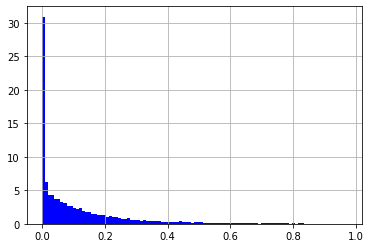

In [34]:
import matplotlib.pyplot as plt

data = x
print(type(data))
plt.hist(data, bins=100, density=True, alpha=1, color='blue') 
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.show()

In [3]:
df = pd.read_csv('/data/haunt/RNA-GAN/data/data.csv')

In [26]:
# df = df.drop(['Unnamed: 0'], axis = 1)
# df.head()
df.to_csv('/data/haunt/RNA-GAN/data/data.csv', index = False)

In [27]:
df.shape

(13620, 18759)

In [5]:
import random


images = [1,2,3,4,5,6,7,8,9]


random_indices = random.sample(range(len(images)), 3)


random_images = [images[i] for i not in random_indices]
random_indices, random_images


([2, 6, 1], [3, 7, 2])

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
def plot_images(images, filename):
    h, w, c = images.shape[1:]
    grid_size = ceil(np.sqrt(images.shape[0]))
    images = (images + 1) / 2. * 255.
    images = images.astype(np.uint8)
    images = (images.reshape(grid_size, grid_size, h, w, c)
              .transpose(0, 2, 1, 3, 4)
              .reshape(grid_size*h, grid_size*w, c))
    #plt.figure(figsize=(16, 16))
    plt.imsave(filename, images)
    plt.imshow(images)
    plt.show()

In [1]:
import pandas as pd
df = pd.read_csv('data/gene_expression/data_100.csv')

In [5]:
import random
from collections import defaultdict

# Assuming 'pairs' is your list of pairs
pairs = [("value" + str(i), "group" + str(i % 6)) for i in range(100)]

# Group the elements by their group value
grouped_pairs = defaultdict(list)
for value, group in pairs:
    grouped_pairs[group].append((value, group))

# From each group, randomly select at least one element
selected_pairs = [random.choice(group) for group in grouped_pairs.values()]

# From the remaining elements, randomly select enough elements to reach a total of 32
remaining_pairs = [pair for pair in pairs if pair not in selected_pairs]
selected_pairs += random.sample(remaining_pairs, 32 - len(selected_pairs))

# Now, 'selected_pairs' is a list of 32 pairs that includes at least one pair from each group
# selected_pairs

In [13]:
patient = df['patient'].tolist()
patient

['A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A'

In [18]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame
# df = pd.DataFrame(...)

# Group the DataFrame by the 'patient' column
grouped_df = df.groupby('patient')

# From each group, randomly select at least one row
selected_rows = grouped_df.apply(lambda x: x.sample(1))

# Flatten the multi-index DataFrame
selected_rows.reset_index(drop=True, inplace=True)

# From the remaining rows, randomly select enough rows to reach a total of 32
remaining_rows = df.loc[~df.index.isin(selected_rows.index)]
num_remaining_rows = 32 - len(selected_rows)

if num_remaining_rows > 0:
    additional_rows = remaining_rows.sample(num_remaining_rows)
    selected_rows = pd.concat([selected_rows, additional_rows])

# Now, 'selected_rows' is a DataFrame of 32 rows that includes at least one row from each patient group

In [1]:
import os
import shutil
# Specify the directory
directory = 'ST-imgs-split'

# Get the list of all folders in the directory
folders = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]

for patient in folders:
    if patient in ['A', 'B', 'C', 'D']:
        for i in range(1,7):
            new_directory = os.path.join(directory, patient, f'{patient}{str(i)}')
            files = os.listdir(new_directory)

            # Move each file to the destination directory
            for file in files:
                new_file_name = f'{patient}_{i}_{file}'
                
                # Rename the file
                new_file_name = f'{patient}{str(i)}_{file}'
                print(new_file_name)
                os.rename(os.path.join(new_directory, file), os.path.join(new_directory, f'{patient}{str(i)}_{file}'))
                shutil.move(os.path.join(new_directory, new_file_name), 'data/images/all_images')
    else:
        for i in range(1,4):
            new_directory = os.path.join(directory, patient, f'{patient}{str(i)}')
            files = os.listdir(new_directory)

            # Move each file to the destination directory
            for file in files:
                new_file_name = f'{patient}_{i}_{file}'
                
                # Rename the file
                new_file_name = f'{patient}{str(i)}_{file}'
                print(new_file_name)
                os.rename(os.path.join(new_directory, file), os.path.join(new_directory, f'{patient}{str(i)}_{file}'))
                shutil.move(os.path.join(new_directory, new_file_name), 'data/images/all_images')
                        

A1_sub_img_10_13.jpg
A1_sub_img_10_14.jpg
A1_sub_img_10_15.jpg
A1_sub_img_10_19.jpg
A1_sub_img_10_16.jpg
A1_sub_img_10_17.jpg
A1_sub_img_10_22.jpg
A1_sub_img_10_18.jpg
A1_sub_img_10_24.jpg
A1_sub_img_10_20.jpg
A1_sub_img_10_21.jpg
A1_sub_img_10_27.jpg
A1_sub_img_10_23.jpg
A1_sub_img_11_13.jpg
A1_sub_img_10_25.jpg
A1_sub_img_10_26.jpg
A1_sub_img_10_28.jpg
A1_sub_img_11_17.jpg
A1_sub_img_11_14.jpg
A1_sub_img_11_19.jpg
A1_sub_img_11_15.jpg
A1_sub_img_11_16.jpg
A1_sub_img_11_18.jpg
A1_sub_img_11_23.jpg
A1_sub_img_11_24.jpg
A1_sub_img_11_25.jpg
A1_sub_img_11_20.jpg
A1_sub_img_11_21.jpg
A1_sub_img_11_28.jpg
A1_sub_img_11_22.jpg
A1_sub_img_11_26.jpg
A1_sub_img_12_14.jpg
A1_sub_img_11_27.jpg
A1_sub_img_12_12.jpg
A1_sub_img_12_17.jpg
A1_sub_img_12_13.jpg
A1_sub_img_12_15.jpg
A1_sub_img_12_16.jpg
A1_sub_img_12_18.jpg
A1_sub_img_12_19.jpg
A1_sub_img_12_20.jpg
A1_sub_img_12_24.jpg
A1_sub_img_12_21.jpg
A1_sub_img_12_26.jpg
A1_sub_img_12_22.jpg
A1_sub_img_12_23.jpg
A1_sub_img_13_12.jpg
A1_sub_img_12